# **Segunda_Pre_Entrega_Fierro_Villa**

#### 8/11/22


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Objetivo
Para este caso, queremos hacer un análisis de una muestra de datos de películas, series y shows que se encuentran en la plataforma Netflix y determinar que tipos de show tienen mejor puntaje en plataformas de datos de películas (TMDB) y (IMDB), así se podrá tomar decisiones sobre los próximos shows a grabar para la plataforma. Garantizando la continudad y satisfacción de nuestros clientes respecto al contenido mostrado en nuestra platafroma. 

### Contexto Empresarial

Somos cietíficos de datos en una empresa de la industria del cine y tv. En los últimos años se ha incrementado de una manera increíble el consumo de series y películas mediante las distintas plataformas de streaming a nivel local y mundial. Las empresas realizan contratos con otras empresas para mostrar sus películas o series en su plataforma y también crean su propio contenido exclusivo. En base a un análisis profundo debemos determinar que géneros son los más vistos y rentables para mantener a nuestra plataforma cómo líder en el mercado.


### Problema Empresarial
El constante cambio y lanzamiento de nuevo contenido en las plataformas de streaming competidoras nos llevan a tomar acciones y ser precisos en la toma de decisiones respecto a próximos proyectos de grabación y creación de contenido exclusivo y el presupuesto asignado a cada uno. Se requiere crear contenido único y de calidad para la plataforma para así generar fidelidad en el cliente y captar la atención de otros potenciales clientes. 

# Análisis

Preguntas / Hipótesis que queremos responder con el análisis

***¿Cuáles son los géneros más populares?***
Basandonos en los datos podemos decir que los géneros mas populares son:
Comedy, Drama y Documentation

***¿Que duración deberían tener nuestros proyectos?***
Podemos decir que el contenido se divide en dos grandes grupos:
MOVIE y SHOW
Observamos que el contenido SHOW generalmente tiene una duración no mayor a 60min
mientras que MOVIE tiene duraciones desde los 50min a los 200min

- No encontramos una relación directa entre el tiempo de duración y el Puntaje del contenido

***¿Donde deberíamos producir nuestro contenido?***
Es necesario saber que el país donde se producen la mayor cantidad de contenido es USA sacandole
3,2 veces al segundo en la lista INDIA.
USA genera el 33% del contenido de la plataforma

Sin embargo hay que tener en cuenta muchos factores además de este, ya el contenido varía según costumbre, temas, religión, etc y puede gustar más en una zona que en otra. En base a esto podemos considerar la posibilidad de tropicalizar algunos shows y peliculas realizadas en EU al contexto del país al que se quiera llevar una producción. 

***¿Es posible detectar los actores que más gustan a la gente?***
Se podría hacer una consulta para determinar las películas o shows mejor puntuados y así exctraer los actores o directores de tal contenido. Nuevamente debemos entender que EU es el país que mayor contenido produce, por lo que debemos realizar estudios por país ó continente que nos permita ser más exactos en la popularidad de los actores. 

***¿Es el puntaje determinante?***
Al final de este análisis podemos ver que además del puntaje, hay que tener en cuenta la cantidad de votantes que determinan este número, de ahí podemos ver los géneros mas populares, pero no significa que sean los que tengan el mejor puntaje. 

***¿Es positivo comprar contenido antiguo como películas clásicas?***
Es posible tener en cuenta puntajes y cantidad de votantes en películas o series antiguas para poder decidir en el caso de agregar contenido que ya cuenta con años. Nuevos clientes que descubren contenido o amantes del mismo contenido que desean volver a ver el mismo. Comprar contenido antiguo de los show y peliculas más populares sigue siendo muy rentable para nuestra plataforma. La posibilidad de realizar un reboot o remake de algunas de estas series y peliculas podría ser una buena estrategia para nuestro contenido exclusivo. 


### Dataset 

Para este caso, podemos tomar datos de un dataset 'Titles' que contiene toda la información sobre Películas, Shows y Series de nuestra plataforma (Datos provenientes de JustWatch) y de 'Credits', el cuál contiene toda la información referida a los actores, y directores de cada título. Éste último nos puede servir para sacar información sobre cuáles actores y directores trabajan en los títulos mejor puntuados y recibidos por el público.

# Exploración de los Datos

In [ ]:
titles = pd.read_csv('../../titles.csv')
credits = pd.read_csv('../../credits.csv')

In [ ]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


Las variables disponibles son:


- id: ID del contenido en JustWatch.
- title: El nombre del Título.
- show_type: TV show o Movie.
- description: Corta descripción.
- release_year: Año de lanzamiento.
- age_certification: Certificación de Edad.
- runtime: Duración del TV SHOW o MOVIE.
- genres: Listado de géneros.
- production_countries: Listado de países que produjeron el contenido.
- seasons: Número de temporadas (Si el contenido es TV SHOW).
- imdb_id: The title ID on IMDB.
- imdb_score: Score on IMDB.
- imdb_votes: Votes on IMDB.
- tmdb_popularity: Popularity on TMDB.
- tmdb_score: Score on TMDB.

In [ ]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


### Dataset Títulos con Actores

In [ ]:
Data_Actors = pd.merge(left=titles, right=credits, left_on='id', right_on='id')

Data_Actors.shape
Data_Actors

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,48933,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71223,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN,1347054,Nnenna Rachael Okonkwo,Afinni,ACTOR
71224,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN,157590,Lucien Morgan,Dr. Ian Stones,ACTOR
71225,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN,129059,Magdalena Korpas,Jane,ACTOR
71226,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN,2050199,Mistura Olusanya,Nurse Titi,ACTOR


In [ ]:
titles.shape

titles.describe

<bound method NDFrame.describe of              id                                title   type  \
0      ts300399  Five Came Back: The Reference Films   SHOW   
1       tm84618                          Taxi Driver  MOVIE   
2      tm127384      Monty Python and the Holy Grail  MOVIE   
3       tm70993                        Life of Brian  MOVIE   
4      tm190788                         The Exorcist  MOVIE   
...         ...                                  ...    ...   
5801  tm1014599                            Fine Wine  MOVIE   
5802  tm1108171                       Edis Starlight  MOVIE   
5803  tm1045018                                Clash  MOVIE   
5804  tm1098060                       Shadow Parties  MOVIE   
5805   ts271048   Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          1945   
1     A mentally unstable Vietnam War veteran works ...        

In [ ]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


## Valores Nulos
Tenemos en cuenta que hay datos nulos o faltantes, pero no afectan al estudio y análisis que estamos realizando sobre el dataset y con el problema en cuestión.

In [ ]:
titles.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [ ]:
titles['type'].value_counts()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

# Gráficos Descriptivos

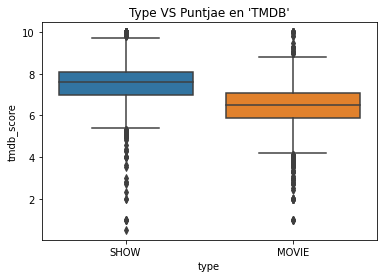

In [ ]:
sns.boxplot(x='type', y = 'tmdb_score', data = titles) 
plt.title("Type VS Puntjae en 'TMDB'");

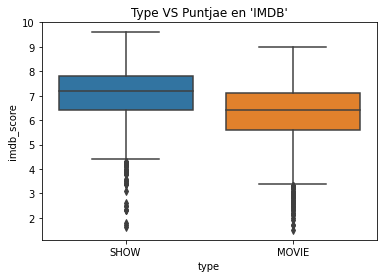

In [ ]:
sns.boxplot(x='type', y = 'imdb_score', data = titles) 
plt.title("Type VS Puntjae en 'IMDB'");

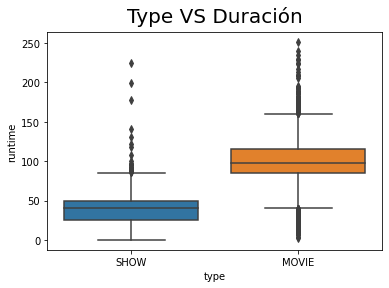

In [ ]:
sns.boxplot(x='type', y = 'runtime', data = titles) 
plt.title("Type VS Duración", fontsize=20, verticalalignment='bottom');

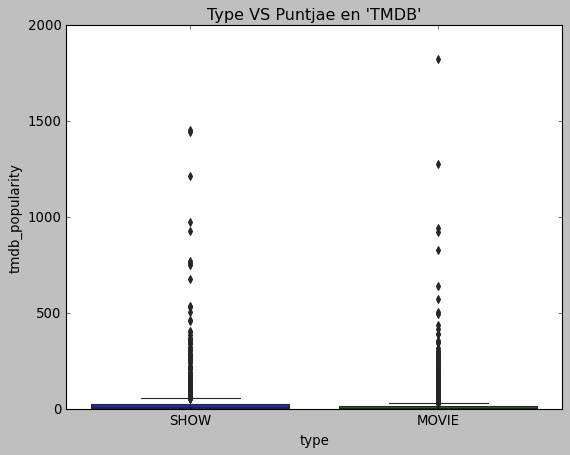

In [ ]:
sns.boxplot(x='type', y = 'tmdb_popularity', data = titles) 
plt.title("Type VS Puntjae en 'TMDB'");

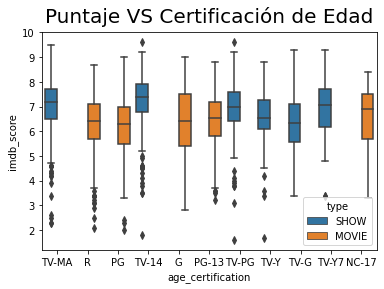

In [ ]:
sns.boxplot(x='age_certification', y = 'imdb_score', hue = 'type', data = titles) 
plt.title("Puntaje VS Certificación de Edad", fontsize=20, verticalalignment='bottom');

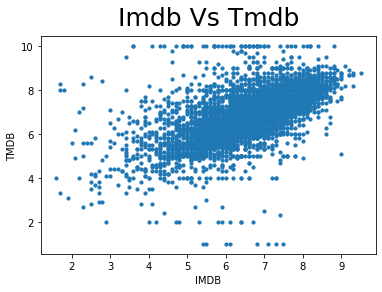

In [ ]:
plt.scatter(titles['imdb_score'],titles['tmdb_score'], s=10)
plt.title("Imdb Vs Tmdb", fontsize=25, verticalalignment='bottom');
plt.xlabel("IMDB");
plt.ylabel("TMDB");

## Tipo de contenido

Text(0.5, 1.0, 'Contenido de la muestra (por Type)')

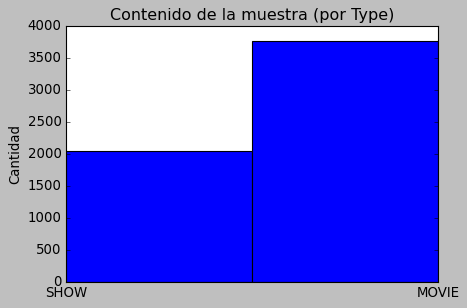

In [ ]:
mpl.style.use('classic')

fig, ax = plt.subplots(figsize=(6,4))

ax.hist(x= titles.type, bins = 2, orientation='vertical')

ax.set_ylabel('Cantidad')
ax.set_title('Contenido de la muestra (por Type)')

In [ ]:
runtime_imdbscore = titles[['id','type','title','runtime','imdb_score','imdb_votes']]
mean_score =runtime_imdbscore['imdb_score'].mean() 
mean_votes =runtime_imdbscore['imdb_votes'].mean() 

runtime_imdbscore.fillna({'imdb_score':mean_score, 'imdb_votes':mean_votes}, inplace=True)

runtime_imdbscore.groupby(by=['runtime']).sum('imdb_score').sort_values(by=['imdb_score'], ascending=False)


C:\Users\User\AppData\Local\Temp\ipykernel_19468\1507710051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_imdbscore.fillna({'imdb_score':mean_score, 'imdb_votes':mean_votes}, inplace=True)


,imdb_score,imdb_votes
runtime,,
24,882.235150,2.262303e+06
45,767.734469,1.479829e+06
44,714.368938,1.554864e+06
90,704.600341,1.802754e+06
100,648.533788,9.264138e+05
...,...,...
196,6.533447,2.340719e+04
194,6.533447,2.340719e+04
177,6.200000,8.454000e+03


## Podemos saber los países donde más se produce el contenido - En orden descendiente

In [ ]:
countries_prod = titles
cp = countries_prod[['title','production_countries']].groupby(by=['production_countries']).count().sort_values(by=['title'], ascending=False)
cp.head(20)

,title
production_countries,
['US'],1950
['IN'],605
['JP'],266
[],231
['GB'],219
['KR'],210
['ES'],159
['FR'],124
['CA'],103


In [ ]:
countries_prod['title'].count()

5805

## Cantidad de contenido en la plataforma según el año de producción

Lo que esto demuestra es la importancia de crear contenido y como ha crecido en los últimos 10 años

<AxesSubplot:xlabel='release_year', ylabel='Count'>

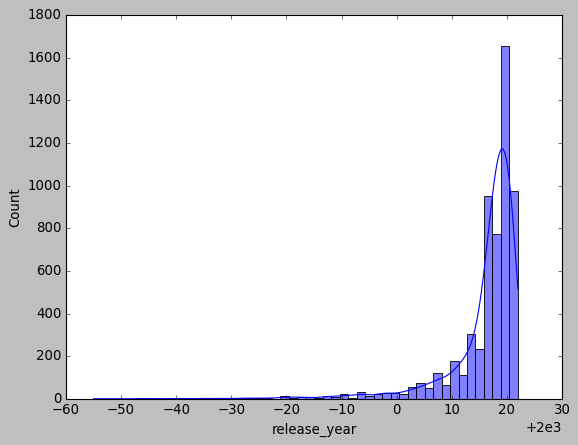

In [ ]:
sns.histplot(data=titles, x='release_year', bins=50, kde=True)

## Los 10 géneros más populares

In [ ]:
ti = titles[['title','genres']].groupby(by=['genres']).count().sort_values(by=['title'], ascending=False)

pop_genres= ti.head(10)

ti.head(10)

,title
genres,
['comedy'],510
['drama'],350
['documentation'],320
"['comedy', 'drama']",141
"['drama', 'comedy']",128
['reality'],120
"['drama', 'romance']",112
"['comedy', 'documentation']",93
['animation'],69


In [ ]:
ti = titles[['title','genres','imdb_score']].groupby(by=['genres'])['imdb_score'].agg(['sum','count']).sort_values(by=['sum'], ascending=False)

ti2 = ti.assign(genre_score=ti['sum'] / ti['count'])

ti2.sort_values(by=['count'], ascending=False).head(20)

,sum,count,genre_score
genres,,,
['comedy'],2744.7,438,6.266438
['drama'],1823.5,273,6.679487
['documentation'],1766.9,249,7.095984
"['comedy', 'drama']",893.9,133,6.721053
"['drama', 'comedy']",767.5,113,6.792035
"['drama', 'romance']",746.3,112,6.663393
['reality'],677.7,107,6.333645
"['comedy', 'documentation']",632.4,91,6.949451
"['comedy', 'romance']",376.3,62,6.069355


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'R'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'G'),
  Text(5, 0, 'PG-13'),
  Text(6, 0, 'TV-PG'),
  Text(7, 0, 'TV-Y'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'TV-Y7'),
  Text(10, 0, 'NC-17')])

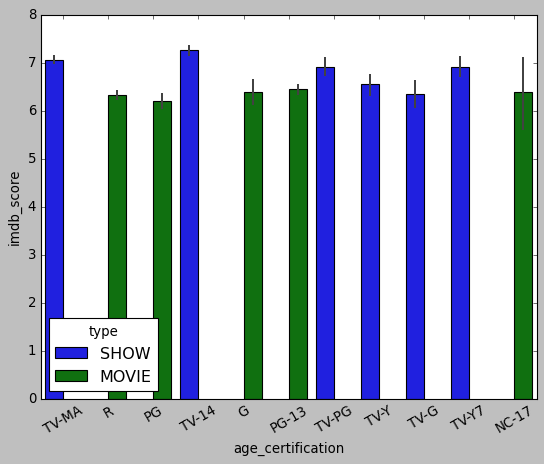

In [ ]:
sns.barplot(x='age_certification', y= 'imdb_score', hue="type", data=titles)
plt.xticks(rotation=30)

<AxesSubplot:xlabel='runtime', ylabel='imdb_score'>

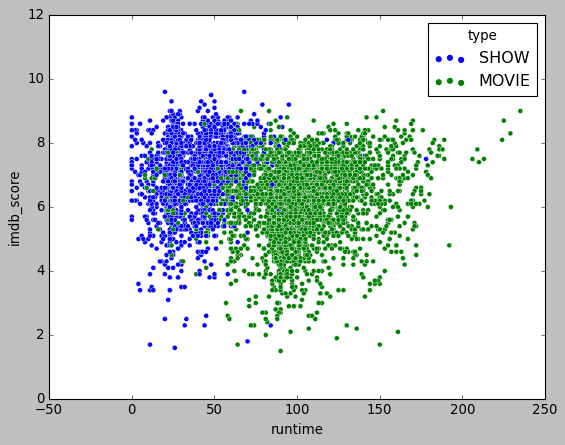

In [ ]:
sns.scatterplot(data=titles, x="runtime", y="imdb_score", hue="type")

## También el puntaje de 'IMDB' de acuerdo a los generos mas populares, en este caso 'Comedy'

In [ ]:

comedy = titles[titles['genres'].str.contains("'comedy'")==True]
com = comedy.sort_values(by=['imdb_score'], ascending=False)
mean_score = comedy['imdb_score'].mean()
com.fillna({'imdb_score':mean_score}, inplace=True)
com2 = com.loc[com['production_countries'].isin(["['US']","['JP']","['IN']"])]
com2

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3827,ts90621,Kota Factory,SHOW,"Dedicated to Shrimati SL Loney ji, Shri Irodov...",2019,TV-MA,42,"['drama', 'comedy']",['IN'],2.0,tt9432978,9.300000,66985.0,10.107,8.2
717,ts32835,Hunter x Hunter,SHOW,Twelve-year-old Gon Freecss one day discovers ...,2011,TV-14,23,"['drama', 'action', 'comedy', 'crime', 'animat...",['JP'],3.0,tt2098220,9.000000,87857.0,117.924,8.8
112,ts34435,Cowboy Bebop,SHOW,"In 2071, roughly fifty years after an accident...",1998,TV-14,25,"['western', 'action', 'scifi', 'thriller', 'an...",['JP'],1.0,tt0213338,8.900000,112887.0,34.769,8.5
47,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.900000,302700.0,128.743,8.3
288,ts17942,Chappelle's Show,SHOW,Dave Chappelle's singular point of view is unl...,2003,TV-14,21,"['comedy', 'music']",['US'],3.0,tt0353049,8.800000,62140.0,13.557,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,tm1187638,Ronny Chieng: Speakeasy,MOVIE,"Ronny shares his journey during the pandemic, ...",2022,NaN,60,['comedy'],['US'],NaN,tt18830896,6.424303,NaN,5.518,6.6
5218,ts315144,The Creature Cases,SHOW,"Follows Sam Snow and Kit Casey, two brilliant ...",2022,TV-Y,0,"['animation', 'family', 'action', 'comedy']",['US'],1.0,tt15527326,6.424303,NaN,5.349,8.3
5556,tm1073802,Mimi,MOVIE,An aspiring actress in a small town in Rajasth...,2021,NaN,132,"['comedy', 'drama']",['IN'],NaN,NaN,6.424303,NaN,7.415,7.2
5636,tm1030071,Mandela,MOVIE,An underprivileged hairdresser becomes the gam...,2021,NaN,140,"['drama', 'comedy']",['IN'],NaN,NaN,6.424303,NaN,4.446,7.5


## Se puede observar el promedio de puntaje en 'IMDB' que obtienen los 3 países que más contenido producen en el género comedia

(array([0, 1, 2]),
 [Text(0, 0, "['IN']"), Text(1, 0, "['JP']"), Text(2, 0, "['US']")])

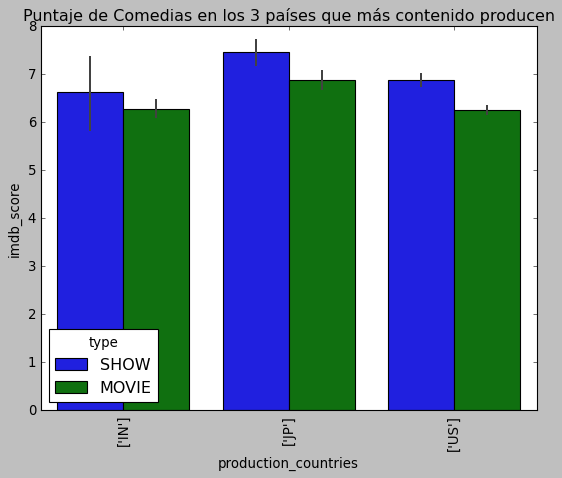

In [ ]:
ax = sns.barplot(x="production_countries", y="imdb_score", hue="type", data=com2).set(title='Puntaje de Comedias en los 3 países que más contenido producen')
plt.xticks(rotation=90)

# ¿Qué duración deberían tener las comedias de acuerdo a datos anteriores de comedias con alto puntaje?

<AxesSubplot:xlabel='release_year', ylabel='imdb_score'>

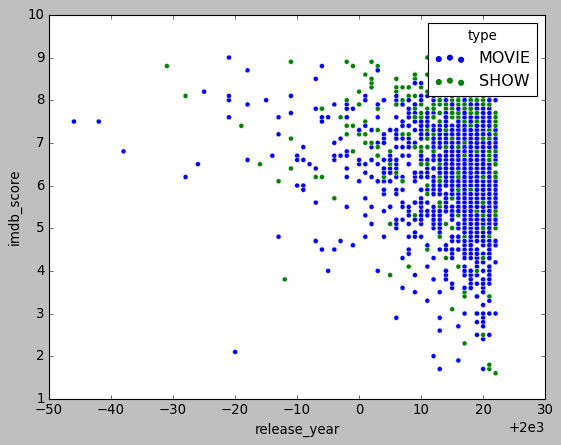

In [ ]:
comedy = titles[titles['genres'].str.contains("'comedy'")==True]

sns.scatterplot(data=comedy, x="release_year", y="imdb_score", hue="type")

# Relación entre el Año de Película y la duración de la misma, sólo de los generos mas populares

<AxesSubplot:xlabel='release_year', ylabel='runtime'>

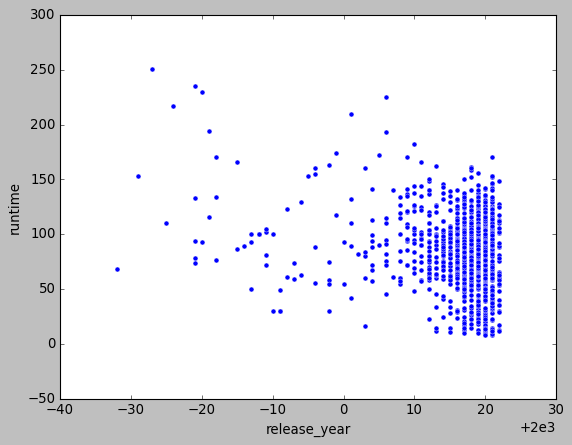

In [ ]:
movies = titles.loc[titles['type'].isin(["MOVIE"])]
movies2 = movies.loc[movies['genres'].isin(pop_genres.index)]
sns.scatterplot(data=movies2, x="release_year", y="runtime")

# Relación entre la duración de una película y el Puntaje en IMDB (Hasta 2010)

<AxesSubplot:xlabel='runtime', ylabel='imdb_score'>

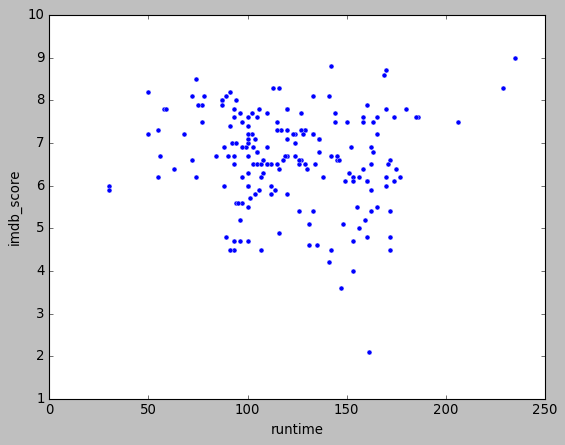

In [ ]:
m = titles.loc[titles['type'].isin(["MOVIE"])]
m2010 = m[m.release_year <= 2000]
m2010.sort_values(by=['release_year'], ascending=False)
sns.scatterplot(data=m2010, x="runtime", y="imdb_score")

# Relación entre la duración de una película y el Puntaje en IMDB (Desde 2010 hasta el presente)

<AxesSubplot:xlabel='runtime', ylabel='imdb_score'>

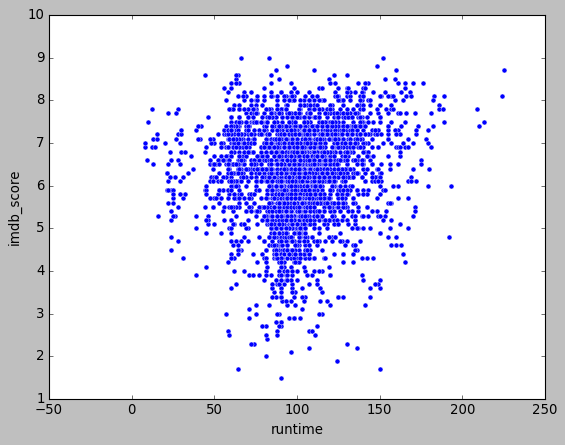

In [ ]:
m2011 = m[m.release_year > 2000]
m2011.sort_values(by=['release_year'], ascending=False).head()
sns.scatterplot(data=m2011, x="runtime", y="imdb_score")

# Directores de películas ordenadas según su puntaje

In [ ]:
best_directors = Data_Actors[Data_Actors['role'].str.contains("DIRECTOR")==True]
bd = best_directors[['title','genres','imdb_score','name','role', 'release_year']].sort_values(by=['imdb_score'], ascending=False)


bd[bd.release_year > 2010]

,title,genres,imdb_score,name,role,release_year
20065,Reply 1988,"['comedy', 'drama', 'family', 'romance']",9.2,Shin Won-ho,DIRECTOR,2015
40013,The Last Dance,"['documentation', 'history', 'sport']",9.1,Jason Hehir,DIRECTOR,2020
43300,David Attenborough: A Life on Our Planet,['documentation'],9.0,Keith Scholey,DIRECTOR,2020
36888,C/o Kancharapalem,['drama'],9.0,Venkatesh Maha,DIRECTOR,2018
43302,David Attenborough: A Life on Our Planet,['documentation'],9.0,Alastair Fothergill,DIRECTOR,2020
...,...,...,...,...,...,...
70865,The Last Kids on Earth: Happy Apocalypse to You,"['comedy', 'fantasy']",NaN,Steve Rolston,DIRECTOR,2021
70939,Love or Money,['comedy'],NaN,Mae Cruz-Alviar,DIRECTOR,2021
71027,My Heroes Were Cowboys,['documentation'],NaN,Tyler Greco,DIRECTOR,2021
71138,Masameer County,[],NaN,Malik Nejer,DIRECTOR,2021


In [ ]:
bd2 = bd.groupby(by=['name']).count()
bd2.sort_values(by=['title'], ascending=False).head(20)

,title,genres,imdb_score,role
name,,,,
Raúl Campos,20,20,20,20
Jan Suter,19,19,19,19
Jay Karas,15,15,14,15
Marcus Raboy,14,14,14,14
Ryan Polito,13,13,11,13
Cathy Garcia-Molina,12,12,12,12
Jay Chapman,12,12,11,12
Youssef Chahine,10,10,10,10
Justin G. Dyck,8,8,8,8


# Matriz de correlación

In [ ]:
corr_df = titles.corr()
print("The correlation DataFrame is:")
print(corr_df, "\n")

The correlation DataFrame is:
                 release_year   runtime   seasons  imdb_score  imdb_votes  \
release_year         1.000000 -0.211076 -0.505831   -0.102849   -0.196988   
runtime             -0.211076  1.000000 -0.132740   -0.159297    0.138610   
seasons             -0.505831 -0.132740  1.000000    0.097727    0.212645   
imdb_score          -0.102849 -0.159297  0.097727    1.000000    0.189954   
imdb_votes          -0.196988  0.138610  0.212645    0.189954    1.000000   
tmdb_popularity      0.025628 -0.027493  0.331362    0.023159    0.201813   
tmdb_score           0.049107 -0.285232  0.026796    0.587675    0.109720   

                 tmdb_popularity  tmdb_score  
release_year            0.025628    0.049107  
runtime                -0.027493   -0.285232  
seasons                 0.331362    0.026796  
imdb_score              0.023159    0.587675  
imdb_votes              0.201813    0.109720  
tmdb_popularity         1.000000    0.068405  
tmdb_score              

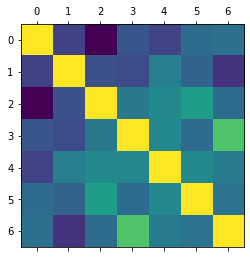

In [ ]:
corr_df2 = titles.corr(method='pearson')

plt.matshow(corr_df2)
plt.show()

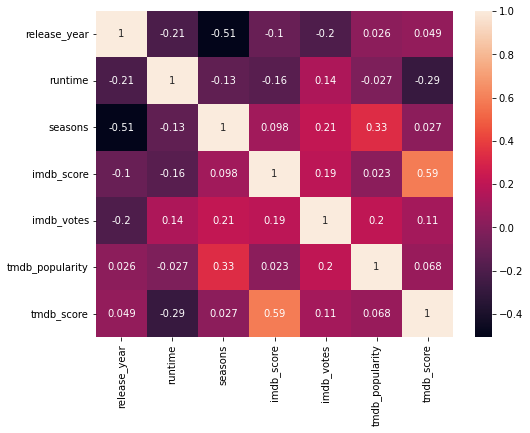

In [ ]:
corr_df3 = titles.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df3, annot=True)
plt.show()

# Apartado de Conclusiones

Luego del análisis de los datos, la utilización de herramientas de visualización, entendemos que es suficiente para poder determinar la respuesta de los interrogantes planteados en el inicio de este notebook. Como podemos saber que la comedia es el género más popular y será positivo para la empresa la producción de contenido relacionado a los géneros comedia, drama y documentales, como primera medida.
Las comedias que son de tipo TV SHOW deben tener una duración corta con respecto a las de tipo MOVIE y además los países que más producen son EEUU, JAPÓN E INDIA. Por lo tanto se podría realizar un plan de producción basandose en estos mismos.
No se observa una diferencia determinante en cuanto a la calidad o puntaje en el contenido clásico ( o antiguo ) y al contenido actual, por lo que podemos decir que es factible realizar un análisis de costo/beneficio para comprar contenido y poder ahorrar el costo de producirlo con nuestro equipo.

# **DATA WRANGLING**

In [ ]:
missing_data = titles.isnull()
missing_data.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

id
False    5806
Name: id, dtype: int64

title
False    5805
True        1
Name: title, dtype: int64

type
False    5806
Name: type, dtype: int64

description
False    5788
True       18
Name: description, dtype: int64

release_year
False    5806
Name: release_year, dtype: int64

age_certification
False    3196
True     2610
Name: age_certification, dtype: int64

runtime
False    5806
Name: runtime, dtype: int64

genres
False    5806
Name: genres, dtype: int64

production_countries
False    5806
Name: production_countries, dtype: int64

seasons
True     3759
False    2047
Name: seasons, dtype: int64

imdb_id
False    5362
True      444
Name: imdb_id, dtype: int64

imdb_score
False    5283
True      523
Name: imdb_score, dtype: int64

imdb_votes
False    5267
True      539
Name: imdb_votes, dtype: int64

tmdb_popularity
False    5712
True       94
Name: tmdb_popularity, dtype: int64

tmdb_score
False    5488
True      318
Name: tmdb_score, dtype: int64



#### Sobre el Data Wrangling

Además de tener muchos datos faltantes o nulos, por ejemplo en la columna 'seasons' o en 'age_certification', pensamos que no afectan el análisis, por esto, no sería necesario transformar dichos datos.

In [ ]:
missing_data.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
md = missing_data.loc[missing_data.loc[:, 'title'] == 'True']
md

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [ ]:
titles['seasons'].replace(np.nan, 1, inplace=True)

In [ ]:
titles['seasons'].value_counts()

1.0     4946
2.0      374
3.0      181
4.0      116
5.0       76
6.0       40
7.0       16
8.0       14
9.0        9
11.0       7
10.0       5
15.0       4
12.0       4
24.0       3
13.0       2
14.0       2
19.0       1
18.0       1
29.0       1
21.0       1
42.0       1
39.0       1
37.0       1
Name: seasons, dtype: int64

In [ ]:
titles.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

# Agrupamiento

In [ ]:
titles_num = titles[['release_year','runtime','tmdb_score']]
titles_num

,release_year,runtime,tmdb_score
0,1945,48,NaN
1,1976,113,8.2
2,1975,91,7.8
3,1979,94,7.8
4,1973,133,7.7
...,...,...,...
5801,2021,100,NaN
5802,2021,74,8.5
5803,2021,88,NaN
5804,2021,116,NaN


In [ ]:
mean = titles_num['tmdb_score'].mean()
print(mean)

6.818039358600574


In [ ]:
titles_num.fillna(mean, inplace=True)
titles_num

C:\Users\User\AppData\Local\Temp\ipykernel_19468\3171501554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_num.fillna(mean, inplace=True)


,release_year,runtime,tmdb_score
0,1945,48,6.818039
1,1976,113,8.200000
2,1975,91,7.800000
3,1979,94,7.800000
4,1973,133,7.700000
...,...,...,...
5801,2021,100,6.818039
5802,2021,74,8.500000
5803,2021,88,6.818039
5804,2021,116,6.818039


In [ ]:
titles_num

,release_year,runtime,tmdb_score
0,1945,48,6.818039
1,1976,113,8.200000
2,1975,91,7.800000
3,1979,94,7.800000
4,1973,133,7.700000
...,...,...,...
5801,2021,100,6.818039
5802,2021,74,8.500000
5803,2021,88,6.818039
5804,2021,116,6.818039


In [ ]:
titles_num.isna().sum()

release_year    0
runtime         0
tmdb_score      0
dtype: int64

In [ ]:
titles_norm = (titles_num-titles_num.min())/(titles_num.max()-titles_num.min())
titles_norm

,release_year,runtime,tmdb_score
0,0.000000,0.191235,0.665057
1,0.402597,0.450199,0.810526
2,0.389610,0.362550,0.768421
3,0.441558,0.374502,0.768421
4,0.363636,0.529880,0.757895
...,...,...,...
5801,0.987013,0.398406,0.665057
5802,0.987013,0.294821,0.842105
5803,0.987013,0.350598,0.665057
5804,0.987013,0.462151,0.665057


In [ ]:
titles_norm.describe()

,release_year,runtime,tmdb_score
count,5806.000000,5806.000000,5806.000000
mean,0.922252,0.309339,0.665057
std,0.095128,0.157268,0.119897
min,0.000000,0.000000,0.000000
25%,0.909091,0.175299,0.600000
50%,0.948052,0.334661,0.665057
75%,0.974026,0.418327,0.736842
max,1.000000,1.000000,1.000000


In [ ]:
wcss=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(titles_norm)
    wcss.append(kmeans.inertia_)

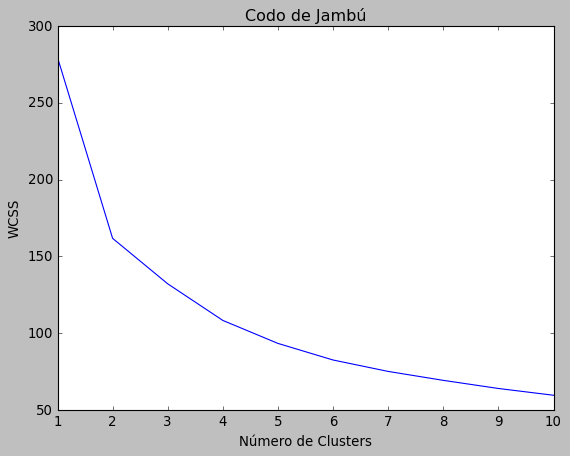

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('Codo de Jambú')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Clustering K = 2

In [ ]:
clustering = KMeans(n_clusters=2, max_iter=300)
clustering.fit(titles_norm)

KMeans(n_clusters=2)

In [ ]:
titlesk2 = titles
titlesk2['Cluster'] = clustering.labels_
titlesk2.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Cluster
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,1
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,1
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,1
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,1
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,1
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3,0
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5,1
7,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,"['drama', 'music', 'romance', 'family']",['US'],NaN,tt0058385,7.8,94121.0,15.949,7.6,1
8,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'drama']",['US'],NaN,tt0080453,5.8,69053.0,44.038,6.2,1
9,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['drama', 'crime', 'action']",['US'],NaN,tt0061418,7.7,111189.0,15.309,7.5,1


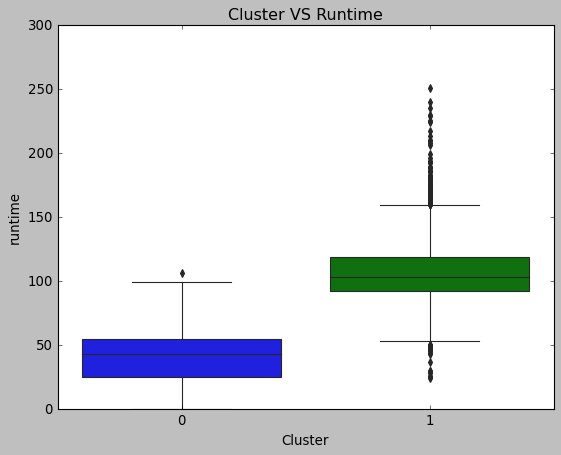

In [ ]:
sns.boxplot(x='Cluster', y = 'runtime', data = titlesk2) 
plt.title("Cluster VS Runtime");

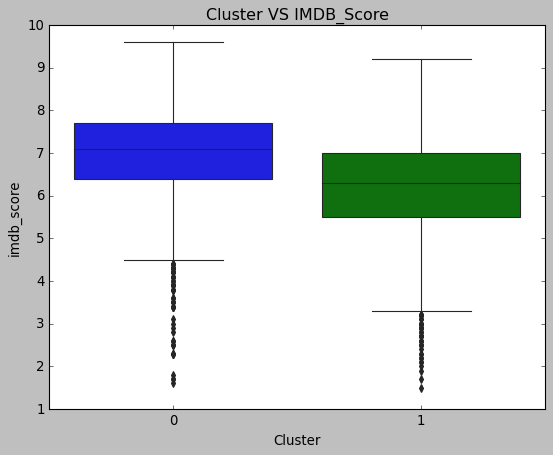

In [ ]:
sns.boxplot(x='Cluster', y = 'imdb_score', data = titlesk2) 
plt.title("Cluster VS IMDB_Score");

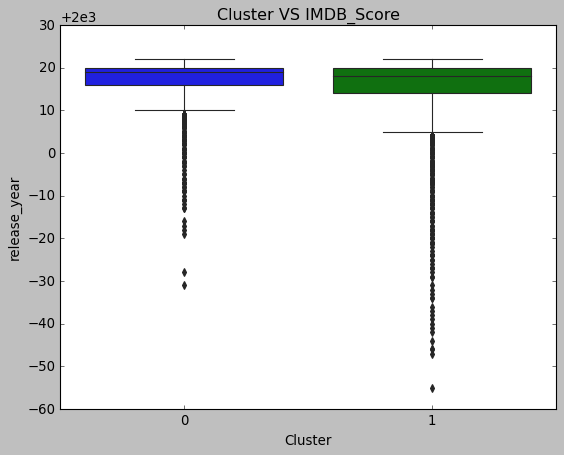

In [ ]:
sns.boxplot(x='Cluster', y = 'release_year', data = titlesk2) 
plt.title("Cluster VS IMDB_Score");

<AxesSubplot:xlabel='release_year', ylabel='imdb_score'>

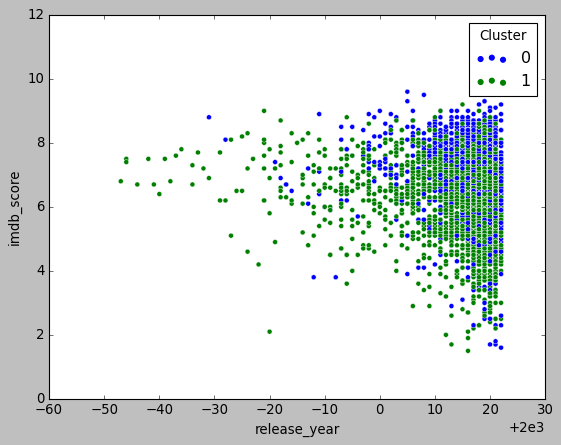

In [ ]:
sns.scatterplot(data=titlesk2, x="release_year", y="imdb_score", hue="Cluster")

<AxesSubplot:xlabel='runtime', ylabel='imdb_score'>

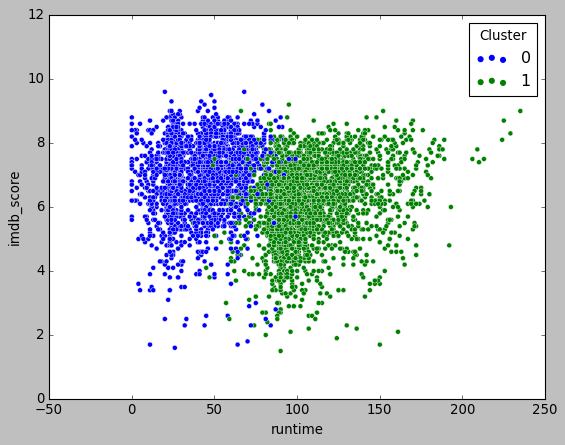

In [ ]:
sns.scatterplot(data=titlesk2, x="runtime", y="imdb_score", hue="Cluster")

<AxesSubplot:xlabel='runtime', ylabel='imdb_score'>

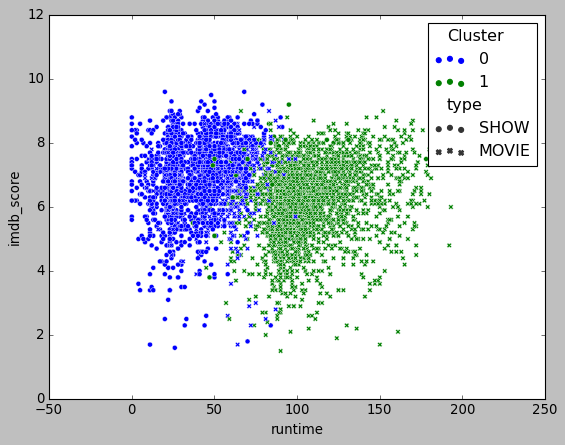

In [ ]:
sns.scatterplot(data=titlesk2, x="runtime", y="imdb_score", hue="Cluster", style="type")

# Clustering K = 3

In [ ]:
clustering3 = KMeans(n_clusters=3, max_iter=300)
clustering3.fit(titles_norm)

KMeans(n_clusters=3)

In [ ]:
titlesk3 = titles
titlesk3['Cluster3'] = clustering3.labels_
titlesk3.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Cluster,Cluster3
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,1,2
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,1,2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,1,2
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,1,2
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,1,2


<AxesSubplot:xlabel='runtime', ylabel='imdb_score'>

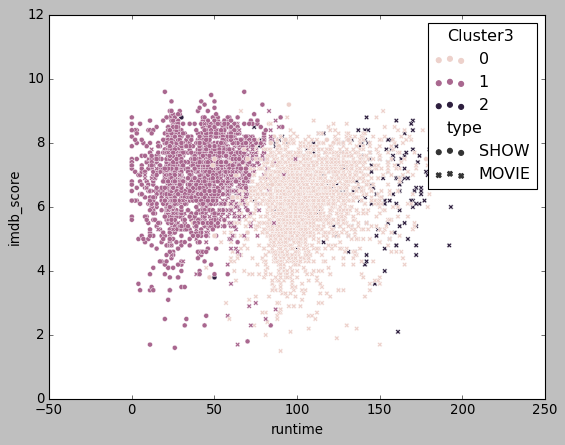

In [ ]:
sns.scatterplot(data=titlesk3, x="runtime", y="imdb_score", hue="Cluster3", style="type")

In [ ]:
clusters3 = titlesk3.groupby(['Cluster3'])['Cluster3'].count()
clusters3

Cluster3
0    2958
1    2561
2     287
Name: Cluster3, dtype: int64

# **INSIGHTS**

- EEUU es el país con más producciones y por lo tanto con mayor experiencia para realizar proyectos cinematográficos
- USA genera el 33% del contenido de la plataforma
- El género comedia, drama y documentales son los géneros más populares
- Si el contenido es de tipo Show se puede tener en cuenta que si obtiene buenas valoraciones se puede sacar provecho realizando mas temporadas
- El contenido SHOW generalmente tiene una duración no mayor a 60min 
- El contenido MOVIE tiene duraciones desde los 50min a los 200min
- No se encontró una relación directa entre el tiempo de duración y el Puntaje del contenido
- Se realizará un agrupamiento/clustering para determinar grupos y tipos de contenido personalizado